In [1]:
# Run this cell before beginning the exercises.

# package imports (SHIFT + ENTER to run)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from IPython.display import YouTubeVideo
from typing import List, Tuple, Optional, Union


# Introduction

Hello Microlenser. I am your Guide. 

I'll keep this introduction brief, incase you are short on time. 

This notebook is going to take a liesurely stroll through the "basic" concepts of microlensing. This topic is complex and has a lot of naunce, so I propose we first familiarise ourselves with the scientific motivations, background information, and key discoveries (the stuff that doesn't make us want to bang our heads against the wall) and get to know each other a little. But if that doesn't sound like somthing you want to do, I'm not offended; I'm a notebook. 

Below is a list of the concepts we will cover here. Feel free to skip to whatever point makes you feel good. Or skip this whole notebook by going straight to the Next Steps section.

## Contents
- [1. What is microlensing?](#1-what-is-microlensing)
- [2. What is it used for?](#2-what-is-it-used-for)
  - [2.1 Exoplanets](#21-exoplanets)
  - [2.2 Brown dwarfs](#22-brown-dwarfs)
    - [2.2.1 Brown dwarf observations and microlensing discoveries](#221-brown-dwarf-observations-and-microlensing-discoveries)
    - [2.2.2 Two different formation groups?](#222-two-different-formation-groups)
    - [2.2.3 Counter-rotators and their implications for the mass function](#223-counter-rotators-and-their-implications-for-the-mass-function)
  - [2.3 Black holes and other remnants](#23-black-holes-and-other-remnants)
  - [2.4 Dark matter](#24-dark-matter)
    - [2.4.1 Why do we need it?](#241-why-do-we-need-it)
    - [2.4.2 What is it?](#242-what-is-it)
    - [2.4.3 The MACHO project](#243-the-macho-project)
- [Next steps](#next-steps)

There are walls of text comming up, and if you are not ethused by that, I get it. Consider watching [this introductory lecture](https://www.youtube.com/watch?v=vuxb6jjg5vc) by Rachael Street (author of [Microlensing Source](https://www.microlensing-source.org/tutorial/pspl/)), from the [2017 Sagan Summer Workshop](https://nexsci.caltech.edu/workshop/2017/agenda.shtml), instead. 

> The slides are not stepped through at the correct times in the video, but they are available [here](https://nexsci.caltech.edu/workshop/2017/street_intro_to_microlensing2.pdf).

Also, it may still be worth browsing the activities in this notebook to help build your intuition and code base. For example, there are some interactive plots in [Section 1](#1-what-is-microlensing), python querries of the NASA Exoplanet Archive in [Section 2.1](#21-exoplanets), reading and visualising data from csv files in [Section 2.2](#22-brown-dwarfs), python querries of Simbad and json file usage in [Section 3.2](#32-the-current-generation-survey-dominated). 

All of the exercises are meant to help build you intuition for microlensing, but they also provide a variety of examples of different analysis and visualisations you can perform with python. As always with these notebooks, it is intended that you skip content as you see fit. If doing the python exercise it not something that floats your boat, you can always use the model code in the `Exercises` subfolder to see the intended results. Similarly, they are there to help you if/when you get stuck.

Okay, let's meander a bit. This notebook will make use of a variety of media to keep it accessable and interesting for all users. And, if you need some motivation, or dopamine throughout, take a look at the [checklist tool](ProgressChecklist.ipynb) where you can tick off sections for this notebook as you complete them.

Here is a cozy little youtube video to get us in to the mood for learning about microlensing  (and also to check that I'm running correctly).

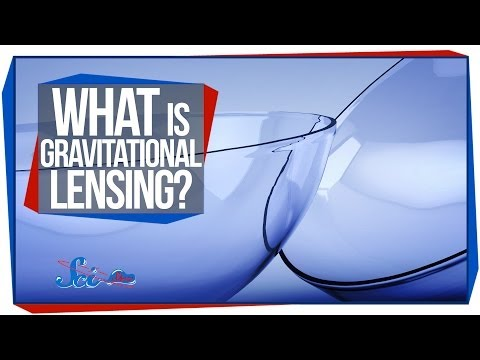

In [2]:
YouTubeVideo('VeAVmp9MLH4', width=560, height=315)

The above video may not work for you if you are using an [IDE](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Integrated_development_environment&ved=2ahUKEwjT2_uJ4OOIAxU1MNAFHU52DUAQFnoECBgQAQ&usg=AOvVaw26G_hSQrwphgc0qRbOs_Ur). Try clicking this [link](https://www.youtube.com/watch?v=VeAVmp9MLH4) to open it in a browser. We will provide links, like the one above, for all embedded videos in these Notebooks.

If you are still having issues, consider openning this notebook in a browser by running

```bash
(TheGuide) Notebooks$ jupyter notebook
```

or (recommended)

```bash
(TheGuide) Notebooks$ jupyter lab
```

in a [terminal](https://en.wikipedia.org/wiki/Computer_terminal#Text_terminals), from the `Notebooks` [directory](https://en.wikipedia.org/wiki/Directory_(computing)), with the provded [environment](https://en.wikipedia.org/wiki/Deployment_environment) [activated](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file).

> The part in brackets (`(TheGuide)`) tells us the environment we have activated and the part before the dollar sign (`Notebooks$`) tells us what folder, or directory, we are in.

Gravitational lensing is a strange and fascinating phenomenon in astrophysics and a uniquely powerful tool for unveiling the secrets of the universe.  At its core, this phenomenon is rooted in Einstein's theory of general relativity. It occurs when the gravity of massive objects, such as galaxies, stars, planets, or dark matter, curves spacetime, distorting the path travelled by light as it passes by, as if the light were passing through a **lens**. This can make the objects producing this light (the **source**s) appear to be in locations they are not and as shapes they are not. If the visible source is approximately behind a simple lensing mass, as seen by an observer, the source will be observed as a magnified image, or images, of itself. These images will form about the [Einstein ring](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Einstein_ring&ved=2ahUKEwiFh_et4OOIAxU578kDHTPhAYwQFnoECBYQAQ&usg=AOvVaw2L-WOWW_yeDFzWYp_JfVWT) and will often appear stretched and curved. The radius of this ring, $\tilde{r}_E$, is dependent on the mass of the lens; a greater mass results in a larger Einstein ring.

> Microlensing Source has an excellent [glossary of microlensing variables](https://www.microlensing-source.org/glossary), for when you eneviatbly loose track of them all. We have included a [pdf version](../GuideEntries/Glossary.pdf) in the 'GuideEntries' directory, should you require it.


The angular Einstein radius is defined by,

$$ \theta_{\rm E} =\left( \frac{4GM_{\rm L}}{c^2} \frac{D_{\rm LS}}{D_{\rm L} D_{\rm S}} \right){\frac{1}{2}}$$
$$ =\sqrt{M_{\rm L}\kappa\pi_{rel}}, $$

where $M_{\rm L}$ is the total mass of the lens system, $D_{\rm LS}$ is the distance from the lens plane to the source plane, $D_{\rm L}$ is the distance from the observer to the lens plane, $D_{\rm S}$ is the distance from the observer to the source plane, and $\kappa=4G/(c^2\rm{au})\sim8.14 \, \rm{mas}/M_\odot$. 

> Refer to [Microlensing Source](https://www.microlensing-source.org/tutorial/pspl/) for a detailed explanation of how this Einstein ring equation in derived.

Below we define a python function for this angular Einstein ring size. The units for this can be a little bit trickey to get right, so take care when defining you own functions.

In [3]:
def theta_E(M: float, Dl: float, Ds: float) -> float:  # this is a function definition with a type hint
    """
    Calculate the Einstein radius of a lensing system.

    Parameters
    ----------
    M : float
        Mass of the lens in solar masses
    Dl : float
        Distance to the lens in kpc
    Ds : float
        Distance to the source in kpc
    
    Returns
    ----------
    float
        Einstein radius in arcseconds
    
    Notes
    ----------
    The Einstein radius is calculated as:
    ``` math::
    theta_E = sqrt(4 * G * M / c^2 * (1.0 / Dl - 1.0 / Ds)
    ```
    where
    - G is the gravitational constant
    - M is the mass of the lens
    - c is the speed of light
    - Ds is the distance to the source
    - Dl is the distance to the lens.
    """
    
    # Constants
    kappa = 8.144  # mas/M_Sun
    #kappa_mu = kappa*1000  # muas/M_Sun
    #as2muas = 1.0*1000000.0  # 1 as in muas
    as2mas = 1.0*1000.0  # 1 as in mas

    # Calculate Einstein radius
    pirel_as = (1./(Dl*1000)-1.0/(Ds*1000))
    pirel_mas = pirel_as*as2mas
    #pirel_muas = pirel_as*as2muas
    #print(pirel_as, pirel_muas)
    return np.sqrt(kappa * M * pirel_mas)

This ring is a mathematical construct, but the figures below shows some pretty examples of the Einstein ring being observed as it is traced out by source images during gravitational lensing events.

| HST images of gravitational lensing |
|:-:|
| <img src="https://stsci-opo.org/STScI-01FFN1XFARS552W0NKTB5SX326.png" alt="The Molten Ring" width="560"/> |
| ["The Molten Ring”](https://hubblesite.org/contents/media/images/2021/051/01FFN1X6VZ9RKJ8T9QT6FRER8R) - GAL-CLUS-022058s. This image depicts a fairly complete Einstein ring around a spherical lensing galaxy, with minor distortions for foreground galaxies. **Credit:** [ESA](http://www.esa.int/)/Hubble & [NASA](http://www.nasa.gov/), S. Jha **Acknowledgement:** L. Shatz. |
| <img src="https://cdn.esahubble.org/archives/images/screen/potw1506a.jpg" alt="A Smiling Lens" width="560"/> |
| [“A smiling lens.”](https://esahubble.org/images/potw1506a/) This image shows another example of strong gravitational lensing where the image formed about the Einstein ring appears like a mouth under the two "eyes" made from nearby elliptical galaxies. **Credit:** [NASA](http://www.nasa.gov/) & [ESA](http://www.esa.int/) **Acknowledgement:** Judy Schmidt. |

## 1. What is microlensing?

Microlensing is a specific example of gravitational lensing, where the apparent separation of the lensed images is small enough (i.e., microarcseconds) that they cannot be resolved into individual images with current technology. 

In photometric observations, this means that the entire ["strong" lensing effect](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://simple.wikipedia.org/wiki/Gravitational_lensing%23Strong_lensing&ved=2ahUKEwjsyb_F3-OIAxXxHNAFHaaTLZMQ0gIoAXoECBcQAg&usg=AOvVaw0tyN7JqdXk--HO8mbR53fG) is contained within what appears to be a single star or [point-spread function (PSF)](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Point_spread_function&ved=2ahUKEwjlstDo3-OIAxVLLtAFHVG-FWYQFnoECAkQAQ&usg=AOvVaw2xNwJtwWWTn-egxItIx4sM). The lensing can instead be observed because of the changing magnification and number of source-star images creating variations in brightness. The brightness increase is transient in nature as the lens and source are moving relative to each other. This effect is called photometric microlensing. 

<p align=center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/z75aHv9SpVg?si=pkcW9WrT226AkEfh" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p>

> *In bouts of hubris, unbecoming of a notebook, I will often refer to photometric microlensing as simply microlensing. Astrometric microlensing is a topic left out in the cold for the duration of this notebook (my apologies to all the astrometric microlensing Stans), but should you wish to show it some love, you can do so [here](AstrometricMicrolensing.ipynb).*

If we could see the magnified images in a microlensing event forming, they would shimey around paths that trace out the Einstein ring. The event would look something like [this](https://www.youtube.com/embed/2oIvUd0hdKY?si=0IDzw_rL1Q3Ml2KL):

<p align=center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/2oIvUd0hdKY?si=0IDzw_rL1Q3Ml2KL" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p>

Theoretical peak magnification $A_{\rm peak}$, for a simple microlensing event, occurs when the lens and source are most closely aligned, with an angular separation of $u_0$, at time $t_0$. The intensity of an event's $A_{\rm peak}$ depends on how closely the source aligns with the lens (i.e., how small $u_0$ is) and the angular size ($\rho$) of the source, proportional to the angular size of the Einstein ring, $\theta_{\rm E}$. The time taken to shift lens-source relative positions by $\theta_{\rm E}$ is $t_{\rm E}$, which is a proxy for lens-source relative [proper motion](https://en.wikipedia.org/wiki/Proper_motion). 

This angular-separation dependence of the magnification is demonstrated in this figure. 

| ![SL](./Assets/single_trajectories_FS.png) |
| :-: |
| *Left:* Example trajectory diagram in the lens plane, showing set of source trajectories (purple) with varying $u_0$. The lens object position is plotted as a red, filled circle. The scale of the caustic diagram is in units of $\theta_{\rm E}$, and the Einstein ring, about which source images form, is indicated by the dashed grey circle. The angular source size ($\rho=0.05$) and relative trajectory direction are indicated by the circle and arrow on the trajectory lines, respectively. *Right:* Corresponding magnification curves, given the trajectories shown on the diagram (*left*), where $\tau$ is the time, relative to $t_0$, scaled by $t_{\rm E}$. |

A larger $u_0$ means a lower $A_{\rm peak}$ and larger $\rho$ means the magnification curve is more smoothed. This smoothing is termed the ``finite-source effect.'' Theoretically, for a point source ($\rho=0$), $A_{\rm peak}=\infty$ if $u_0=0$. The basic shape of the lightcurves of these point-source-like events is referred to as a Paczynski curve.

If none of that sunk in, don't worry. You'll start to get a feel for it as we move through some examples. We will also learn how to make a figure like the one shown above in the Notebook [SingleLens.ipynb](SingleLens.ipynb).

The slider below alows you to change the physical parameters of a lensing "event" to see how these changes in physical parameters affect the size of the einstein ring. You may need to ensure the interactive plot's cell was the last code cell you ran, for the sliders to be active.

> For quick conversions, it is worth noting that Sun is about 1000 times the mass of Jupiter. So the mass of Jupiter is like one milli-solar masses. 
> The duterium fusion limit is at about 10 Jupiter masses or 0.01 solar masses. 
> The hydrogen fusion limit is around 100 Jupiter masses or 0.1 solar masses.

In [4]:
import ipympl
import matplotlib
import numpy

print("ipympl version:", ipympl.__version__)
print("matplotlib version:", matplotlib.__version__)
print("numpy version:", numpy.__version__)

ipympl version: 0.9.6
matplotlib version: 3.10.0
numpy version: 2.2.1


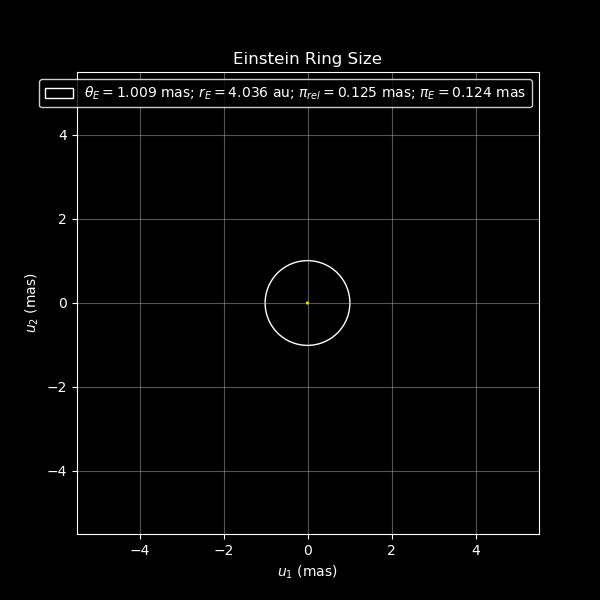

In [17]:
# Interactive Angular Eistein Ring Radius Plot

# If the plot does not present correctly in the notebook, try rerunning the cell.

theta_E_max = 5.5  # Maximum value for theta_E

%matplotlib widget

# Create the figure and axis globally so they are not recreated each time
plt.close(1)  # Close the previous figure if it exists
fig, ax = plt.subplots(num=1, figsize=(6, 6))

# Set plot background and text colors
ax.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Update the plot without making a new figure
fig.canvas.draw()

def update_plot(M: float, Dl: float, Ds: float) -> None:
    """
    Update the plot with the given lensing system parameters.

    Parameters
    ----------
    M : float
        Mass of the lens in solar masses
    Dl : float
        Distance to the lens in kpc
    Ds : float
        Distance to the source in kpc
    """

    global theta_E_max  # Use the global variable for the maximum theta_E value
    theta_E_value = theta_E(M, Dl, Ds)  # mas
    r_E_au = theta_E_value * Dl  # au
    pi_rel = 1.0/(Dl)-1.0/(Ds)  # mas  # CHECK THIS!
    r_E_au = Dl * theta_E_value  # au
    kappa = 8.144  # mas/M_Sun
    pi_E = theta_E_value / (kappa * M)  # mas

    # Update the maximum value if needed
    if theta_E_value > theta_E_max:
        theta_E_max = theta_E_value*1.1  # Increase the maximum value if needed

    # Clear the previous plot content but keep the figure and axis
    ax.cla()  # Clear only the current axes

    fig.patch.set_facecolor('black')  # Set the figure background color to black

    # Plot the circles  # ADD PIE!
    circle = Circle((0, 0), theta_E(M, Dl, Ds), edgecolor='white', facecolor='none', alpha=1.0, 
                    label=r'$\theta_E=$%3.3f mas; $r_E=$%3.3f au; $\pi_{rel}=$%3.3f mas; $\pi_E=$%3.3f mas' %(theta_E_value, r_E_au, pi_rel, pi_E))
    ax.add_patch(circle) 

    # hydrogen fusing mass-radius relation (0.1 < M < 1)
    R = M**0.8 / 0.57
    R_sun2au = 0.00465  # 1 R_sun = 0.00465 au
    rho_L = R * R_sun2au / Dl # kpc, au, -> mas

    # Plot an EXAGGERATED star to represent the lens
    bigger = 10
    star = Circle((0, 0), bigger * rho_L, edgecolor='yellow', facecolor='white') 
    ax.add_patch(star)
    np.save('./Data/multiplication_factor.npy', bigger)

    # Set text colot to white
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.title.set_color('white')

    # Set labels and title
    ax.set_xlabel(r'$u_1$ (mas)')
    ax.set_ylabel(r'$u_2$ (mas)')
    ax.set_title('Einstein Ring Size')

    # Add a white grid
    ax.grid(True, color='darkgrey', alpha=0.5)

    # Set axis to be equal
    ax.set_aspect('equal', adjustable='box')

    # Set the limits to a fixed range for simplicity
    ax.set_xlim(-theta_E_max, theta_E_max)
    ax.set_ylim(-theta_E_max, theta_E_max)

    # Add a legend
    ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Update the plot without making a new figure
    fig.canvas.draw()

# Function to update the Ds slider's minimum value based on Dl
def update_Ds_slider(*args):
    Ds_slider.min = Dl_slider.value + 0.1  # Ensure Ds > Dl, but too close will do silly stuff
    if Ds_slider.value <= Ds_slider.min:
        Ds_slider.value = Ds_slider.min

# Function to handle updates when sliders change
def update_sliders(change):
    # Pass the current values of M, Dl, and Ds to the plot update function
    update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

# Create interactive sliders and text boxes for M, Dl, and Ds
slider_style = {'description_width': '150px'}  # Set the width of the description textboxes
slider_layout = widgets.Layout(width='500px')  # Set the width of the slider bars

# Create interactive sliders and text boxes for M, Dl, and Ds
M_slider = widgets.FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, 
                               description='Mass (solar masses)',
                               style=slider_style, layout=slider_layout)
M_text = widgets.FloatText(value=1.0)

Dl_slider = widgets.FloatSlider(value=4.0, min=1.0, max=10.0, step=0.1, 
                                description='Lens Distance (kpc)',
                                style=slider_style, layout=slider_layout)
Dl_text = widgets.FloatText(value=4.0)

Ds_slider = widgets.FloatSlider(value=8.0, min=5.1, max=10.0, step=0.1, 
                                description='Source Distance (kpc)',
                                style=slider_style, layout=slider_layout)
Ds_text = widgets.FloatText(value=8.0)

# Link sliders and text boxes
widgets.jslink((M_slider, 'value'), (M_text, 'value'))
widgets.jslink((Dl_slider, 'value'), (Dl_text, 'value'))
widgets.jslink((Ds_slider, 'value'), (Ds_text, 'value'))

# Update the Ds slider's minimum value when Dl changes
Dl_slider.observe(update_Ds_slider, 'value')

# Observe slider value changes to trigger plot updates
M_slider.observe(update_sliders, 'value')
Dl_slider.observe(update_sliders, 'value')
Ds_slider.observe(update_sliders, 'value')

# Display sliders and text boxes
display(widgets.HBox([M_slider, M_text]))
display(widgets.HBox([Dl_slider, Dl_text]))
display(widgets.HBox([Ds_slider, Ds_text]))

# Initial plot
update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)


<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 1</h2>
    <p>If you went through the code for this plot, you may have noticed that the size of the lens star has been exaggerated. By what factor is the display star's angular radius too big?</p>
    <br>
    <p><i>Wrtie you answer in the cell below.</i></p>
    <br>
</div>

In [6]:
answer = 0  # replace this value with your answer

if answer == np.load('./Data/multiplication_factor.npy'):
    print('Correct!')
else:
    print('Not quite. Try again.')

Not quite. Try again.


The plot below gives us an intuition for the scale of this angular Eintstein radius in both the lens and projected onto the source plane.

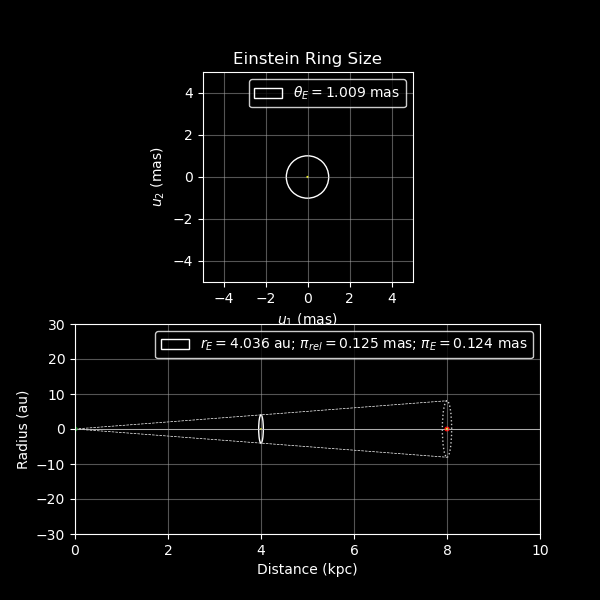

In [18]:
# interactive Einstein radius plot; angular, physical, and projected into the lens plane.

theta_E_max = 5.0  # Maximum value for theta_E

%matplotlib widget

# Create the figure and axis globally so they are not recreated each time
plt.close(100)  # Close the previous figure, if it exists
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), num=100)

fig.patch.set_facecolor('black')  # Set the figure background color to black

# Main plot: Einstein ring
#--------------------------

# Set plot background and text colors
ax1.set_facecolor('black')
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')

# Add a white grid
ax1.grid(True, color='darkgrey', alpha=0.5)

# Set axis to be equal
ax1.set_aspect('equal', adjustable='box')

# Secondary plot: Distance vs. Radius
#------------------------------------

# Set plot background and text colors
ax2.set_facecolor('black')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')

# Add a white grid
ax2.grid(True, color='darkgrey', alpha=0.5)

# Set axis limits
ax2.set_xlim(0, 10)
ax2.set_ylim(-30,  30)
ratio = 5/60  # Full height half width of plot axis 2

ax2.set_xlabel('test label')

# Update the plot without making a new figure
fig.canvas.draw()

def update_plot(M, Dl, Ds):

    global theta_E_max  # Use the global variable for the maximum theta_E value
    theta_E_value = theta_E(M, Dl, Ds)  # mas
    pi_rel = 1.0/(Dl)-1.0/(Ds)  # mas  # CHECK THIS!
    r_E_au = Dl * theta_E_value  # au
    kappa = 8.144  # mas/M_Sun
    pi_E = theta_E_value / (kappa * M)  # mas

    # Update the maximum value if needed
    if theta_E_value > theta_E_max:
        theta_E_max = theta_E_value*1.1  # Increase the maximum value if needed

    # Clear the previous plot content but keep the figure and axis
    ax1.cla()  # Clear only the current axes
    ax2.cla()  # Clear only the current axes

    # Main plot: Einstein ring
    #--------------------------

    ax1.yaxis.label.set_color('white')
    ax1.xaxis.label.set_color('white')
    ax1.title.set_color('white')

    # Plot the circles
    circle = Circle((0, 0), theta_E(M, Dl, Ds), edgecolor='white', facecolor='none', 
                    alpha=1.0, label=r'$\theta_E=$%3.3f mas' %theta_E_value)
    ax1.add_patch(circle)

    # hydrogen fusing mass-radius relation (0.1 < M < 1)
    R = M**0.8 / 0.57
    R_sun2au = 0.00465  # 1 R_sun = ... au
    rho_L = R * R_sun2au / Dl # kpc, au, -> mas

    # Plot an EXAGGERATED star to represent the lens
    bigger = np.load('./Data/multiplication_factor.npy')
    star = Circle((0, 0), bigger * rho_L, edgecolor='yellow', facecolor='white') 
    ax1.add_patch(star)

    # Set the limits to a fixed range for simplicity
    ax1.set_xlim(-theta_E_max, theta_E_max)
    ax1.set_ylim(-theta_E_max, theta_E_max)

    # Add a legend
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Add a white grid
    ax1.grid(True, color='darkgrey', alpha=0.5)

    # Set labels and title
    ax1.set_xlabel(r'$u_1$ (mas)')
    ax1.set_ylabel(r'$u_2$ (mas)')
    ax1.set_title('Einstein Ring Size')

    # Secondary plot: Distance vs. Radius
    #------------------------------------

    ax2.yaxis.label.set_color('white')
    ax2.xaxis.label.set_color('white')

    # Plot the lens star
    R_au = R * R_sun2au
    lens_star = Ellipse((Dl, 0), width=(bigger * R_au * 2 * ratio), height=(bigger * R_au * 2), 
                        edgecolor='yellow', facecolor='white')
    lens_star.set_zorder(1)
    ax2.add_patch(lens_star)
    Earth = Ellipse((0, 0), width=(ratio), height=1, edgecolor='green', facecolor='blue')
    Earth.set_zorder(1)
    ax2.add_patch(Earth)
    Source = Ellipse((Ds, 0), width=(ratio), height=1, edgecolor='red', facecolor='yellow')
    Source.set_zorder(1)
    ax2.add_patch(Source)

    # Plot the Einstein ring as an ellipse
    einstein_ring = Ellipse((Dl, 0), width=0.1, height=2 * r_E_au, edgecolor='white', 
                            facecolor='none', alpha=1.0, 
                            label=r'$r_E=$%3.3f au; $\pi_{rel}=$%3.3f mas; $\pi_E=$%3.3f mas' %(r_E_au, pi_rel, pi_E))
    ax2.add_patch(einstein_ring)

    # Projected ojnto the source plane
    einstein_ring_proj = Ellipse((Ds, 0), width=(0.1 * Ds / Dl), height=2 * Ds * theta_E_value, 
                                 edgecolor='white', facecolor='none', linestyle='dotted', alpha=0.8)
    ax2.add_patch(einstein_ring_proj)

    # Plot the projection lines
    ax2.plot([0, 10], [0, 0], color='white', linestyle='-', zorder=0, linewidth=0.5)
    ax2.plot([0, Ds], [0, Ds * theta_E_value], color='white', linestyle='--', zorder=0, linewidth=0.5)
    ax2.plot([0, Ds], [0, -Ds * theta_E_value], color='white', linestyle='--', zorder=0, linewidth=0.5)

    # Add a white grid
    ax2.grid(True, color='darkgrey', alpha=0.5)

    # Set axis limits
    ax2.set_xlim(0, 10)
    ax2.set_ylim(-30,  30)

    # Set labels and title
    ax2.set_xlabel('Distance (kpc)')
    ax2.set_ylabel('Radius (au)')

    # Add a legend
    ax2.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Update the plot without making a new figure
    fig.canvas.draw()

def update_Ds_slider(*args):
    Ds_slider.min = Dl_slider.value + 0.1  # Ensure Ds > Dl, but too close will do silly stuff
    if Ds_slider.value <= Ds_slider.min:
        Ds_slider.value = Ds_slider.min

# Function to handle updates when sliders change
def update_sliders(change):
    # Pass the current values of M, Dl, and Ds to the plot update function
    update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

# Create interactive sliders and text boxes for M, Dl, and Ds
slider_style = {'description_width': '150px'}  # Set the width of the description textboxes
slider_layout = widgets.Layout(width='500px')  # Set the width of the slider bars

M_slider = widgets.FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, 
                               description='Mass (solar masses)', 
                               style=slider_style, layout=slider_layout)
M_text = widgets.FloatText(value=1.0)

Dl_slider = widgets.FloatSlider(value=4.0, min=0.5, max=10.0, step=0.1, 
                                description='Lens Distance (kpc)', 
                                style=slider_style, layout=slider_layout)
Dl_text = widgets.FloatText(value=4.0)

Ds_slider = widgets.FloatSlider(value=8.0, min=5.1, max=10.0, step=0.1, 
                                description='Source Distance (kpc)', 
                                style=slider_style, layout=slider_layout)
Ds_text = widgets.FloatText(value=8.0)

# Link sliders and text boxes
widgets.jslink((M_slider, 'value'), (M_text, 'value'))
widgets.jslink((Dl_slider, 'value'), (Dl_text, 'value'))
widgets.jslink((Ds_slider, 'value'), (Ds_text, 'value'))

# Update the Ds slider's minimum value when Dl changes
Dl_slider.observe(update_Ds_slider, 'value')

# Observe slider value changes to trigger plot updates
M_slider.observe(update_sliders, 'value')
Dl_slider.observe(update_sliders, 'value')
Ds_slider.observe(update_sliders, 'value')

# Display sliders and text boxes
display(widgets.HBox([M_slider, M_text]))
display(widgets.HBox([Dl_slider, Dl_text]))
display(widgets.HBox([Ds_slider, Ds_text]))

# Initial plot
update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

You might also note how, for a given lens distance, the angular Einstein radius is at its smallest when the source-lens distance ($D_S-D_L$) is small. However, larger source-lens distances have diminishing returns in terms of the increase in angular Einstein radius. To demonstrate, we have made a plot of $\theta_E$ vs $D_S-D_L$. The line on this plot represents a fixed $M_L$ and $D_L$ (1 $M_\odot$, 1 kpc). 

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 2</h2>
    <p>Add a few more lines to this plot for various other <i>M</i><sub>L</sub>, <i>D</i><sub>L</sub> combinations.</p>
    <br>
</div>

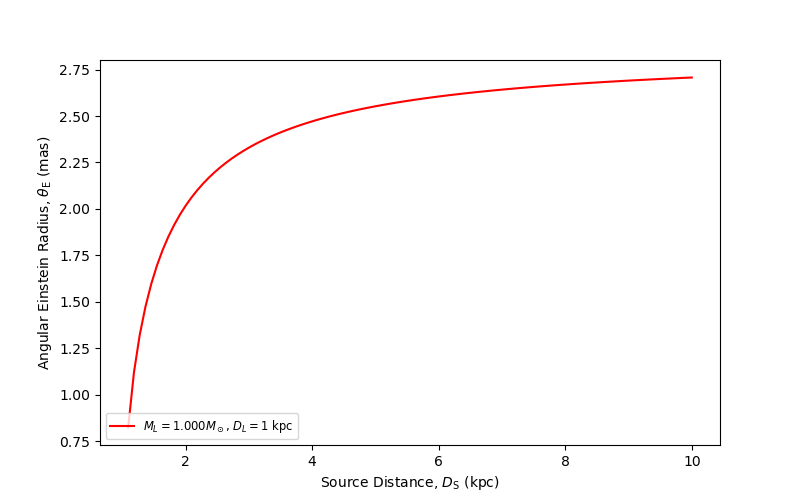

In [8]:
colours = ['red', 'green', 'blue', 'orange']

M = 1.0  # M_sun
Dl = 1.0  # kpc
Ds = np.linspace(Dl, 10, 100)  # kpc
Ds = Ds[1:]  # Remove Ds = Dl

theta_E_values = np.array([theta_E(M, Dl, D) for D in Ds])

plt.close(2)  # Close the previous figure, if it exists
plt.figure(num=2, figsize=(8, 5))  # Create a new figure
plt.plot(Ds, theta_E_values, color=colours[0], label=r'$M_L=1.000M_\odot$, $D_L=1$ kpc')

######################
# Your code goes here
######################

plt.xlabel(r'Source Distance, $D_{\rm{S}}$ (kpc)')
plt.ylabel(r'Angular Einstein Radius, $\theta_{\rm{E}}$ (mas)')
plt.legend(loc='lower left', ncol=3, fontsize='small')
plt.show()

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 3</h2>
    <p>For a fixed mass and source distance, the Eistein radius (<i>r</i><sub>E</sub>) peaks at <i>D</i><sub>L</sub>=<i>D</i><sub>S</sub>/2. Make a plot of <i>r</i><sub>E</sub> vs <i>D</i><sub>L</sub> for a fixed <i>M</i><sub>L</sub> and <i>D</i><sub>S</sub>.</p>
    <br>
</div>


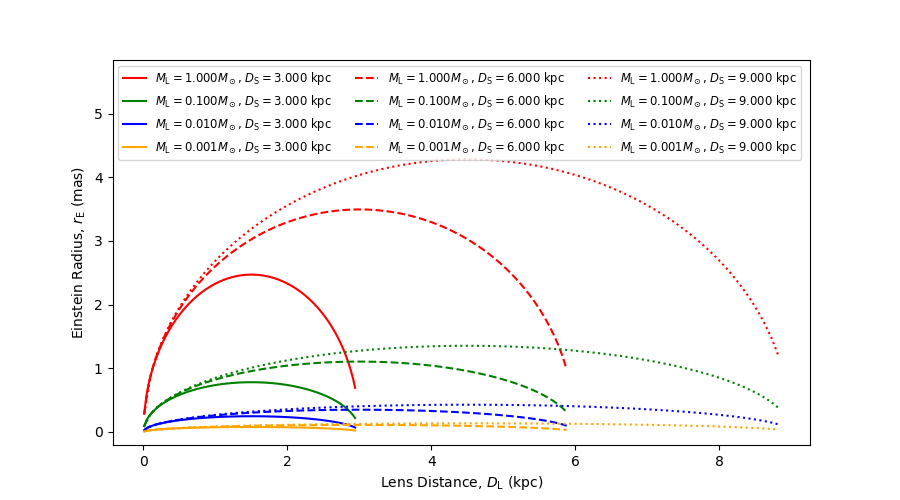

In [9]:
plt.close(3)
plt.figure(num=3, figsize=(9, 5))

######################
# Your code goes here

colours = ['red', 'green', 'blue', 'orange']
format = ['-', '--', ':']

MM = [1.0, 0.1, 0.01, 0.001]  # M_sun
DDs = [3.0, 6.0, 9.0]  # kpc
for j, Ds in enumerate(DDs): 
    Dl = np.linspace(0.01, Ds, 100)  # kpc
    Dl = Dl[0:-2]  # Remove Ds = Dl

    for i, M in enumerate(MM):
        theta_E_values = np.array([theta_E(M, D, Ds) for D in Dl])
        rE_values = theta_E_values * Dl
        plt.plot(Dl, 
                 rE_values, 
                 color=colours[i], 
                 linestyle=format[j],
                 label=r'$M_{\rm{L}}=%.3fM_\odot$, $D_{\rm{S}}=%.3f$ kpc' %(M, Ds))

# making room for the legend
ax = plt.gca()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] * 1.3)

plt.xlabel(r'Lens Distance, $D_{\rm{L}}$ (kpc)')
plt.ylabel(r'Einstein Radius, $r_{\rm{E}}$ (mas)')
plt.legend(loc='upper left', ncol=3, fontsize='small')
######################

plt.show()

If you are wondering why all of the distances have been restricted to between 0 and 10 kpc, this will become clear once you have completed the notebooks for [Galactic Models](GalacticModels.ipynb) and [Optical Depth](OpticalDepth.ipynb). Put simply, the Galactic center is at about 8 kpc from the Sun and the density of stars is much greater there than it is closer to the Sun. There is another effect the affects plausible source distances and that is the extinction in the field. 

Current, ground-based observing strategies concentrate on fields close to the Galactic center to maximise the number of stars that are visible and therefore the return of observed microlensing events. However, these fields are also impeeded by dust from the plane of the galactic disk. The result is that, ground-based, I- and V-band surveys, do not observe source stars much more distant the the Galactic center, becouase the extinction in these bands, with these pointings, is too high. 

> *Ground-based observing strategies, as of 2024.



## 2. What is it used for?

Because only the source light is magnified in a microlensing event, the luminosity of the lens system does not directly contribute to the event's detectability. As a result, microlensing is uniquely capable when it comes to detecting cold, low-mass, dim lenses, such as brown dwarfs and unbound planetary-mass objects, or massive dark lenses like black holes.


In the case where multiple bound objects make up the lens, the resulting magnification will manifest in a manner related to the event's geometry and the mass ratio of the lens system. This means that secondary (companion) objects in bound orbits around the primary (host) objects within the lens, which may or may not be dim, can also be uncovered. Lenses made up of more than one lens object have more complicated geometries with projected source positions of theoretical infinite magnification (given a point source) called caustic curves, and images that form around critical curves, like the undulating bright lines you see when light passes through turbulent water. A more detailed description of critical and caustic curves and model parameterisations is given in the [Binary Lens](BinaryLens.ipynb) notebook. Events with one source and two lens bodies are referred to as binary lens events. These are the events that typically result in microlensing planet detections.

### 2.1 Exoplanets


The search for, and characterisation of [exoplanets](https://en.wikipedia.org/wiki/Exoplanet), is probably the most popularly understood science goal in microlensing. Although it is not the technique that finds the most exoplanets, it is sensitive to members of planetary populations that other methods are not so sensitive to.

We can use this notebook to understand the different sensitivities of each method, by loading the mass and semi-major axis for every discovered exoplanet from the Nasa Exoplanet Archive, using *astroquery*.


In [10]:
# Fetch data from NASA Exoplanet Archive using astroquery
query = NasaExoplanetArchive.query_criteria(table="ps", select="pl_name,pl_bmassj,pl_orbsmax,discoverymethod")
exoplanet_df = query.to_pandas()

# Filter out rows with missing values
exoplanet_df_clean = exoplanet_df.dropna(subset=['pl_bmassj', 'pl_orbsmax']).copy()

# Convert mass from Jupiter masses to Earth masses (1 Jupiter mass = 317.8 Earth masses)
exoplanet_df_clean.loc[:, 'pl_bmasse'] = exoplanet_df_clean['pl_bmassj'] * 317.8

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 4</h2>
    <p>Use the information from the table to draw the solar system planets onto the plot of exoplanet mass vs semi-major axis, in the cell below.</p>
    <br>
</div>

| Planet       | Mass (Earth Masses) | Semi-Major Axis (AU) |
|--------------|---------------------|----------------------|
| Mercury      | 0.055               | 0.387                |
| Venus        | 0.815               | 0.723                |
| Earth        | 1.000               | 1.000                |
| Mars         | 0.107               | 1.524                |
| Jupiter      | 317.8               | 5.204                |
| Saturn       | 95.2                | 9.583                |
| Uranus       | 14.5                | 19.22                |
| Neptune      | 17.1                | 30.05                |



[-0.41228903 -1.25963731] [-0.1408617  -0.08884239] [0. 0.] [ 0.18184359 -0.97061622] [0.71600334 2.50215389] [0.98136551 1.97863695] [1.28375338 1.161368  ] [1.47784448 1.23299611]


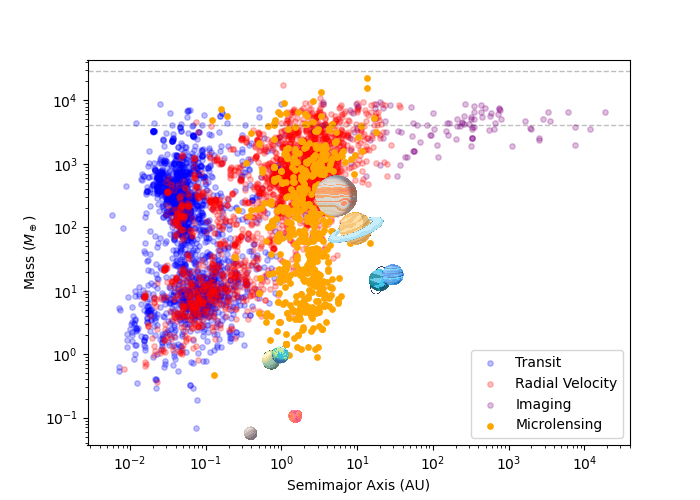

In [11]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Plotting
plt.close(4)
plt.figure(num=4, figsize=(7, 5))

# Define colors for different discovery methods
colors = {
    'Transit': 'blue',
    'Radial Velocity': 'red',
    'Imaging': 'purple',
    'Microlensing': 'orange'
}

# Plot each discovery method with different colors
for method, color in colors.items():
    subset = exoplanet_df_clean[exoplanet_df_clean['discoverymethod'] == method]
    if method == 'Microlensing':
        a = 1.0
    else:
        a = 0.25
    plt.scatter(subset['pl_orbsmax'], subset['pl_bmasse'], c=color, label=method, alpha=a, s=15)

# Planet images
Mercury_png = './Assets/Planets/Mercury.png'
Venus_png = './Assets/Planets/Venus.png'
Earth_png = './Assets/Planets/Earth.png'
Mars_png = './Assets/Planets/Mars.png'
Jupiter_png = './Assets/Planets/Jupiter.png'
Saturn_png = './Assets/Planets/Saturn.png'
Uranus_png = './Assets/Planets/Uranus.png'
Neptune_png = './Assets/Planets/Neptune.png'

# Log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Plot a horizontal line at 13 Jupiter masses (13 * 317.8 Earth masses)
BD = 13 * 317.8  # BD = 13 Jupiter masses in Earth masses
plt.axhline(y=BD, color='black', linestyle='--', linewidth=1, alpha=0.25)
BD = 90 * 317.8  # BD = 13 Jupiter masses in Earth masses
plt.axhline(y=BD, color='black', linestyle='--', linewidth=1, alpha=0.25)

# Labels and title
plt.xlabel(r'Semimajor Axis (AU)')
plt.ylabel(r'Mass ($M_\oplus$)')
plt.legend(loc='lower right')

######################
# Your code goes here
# Planet table values
Mercury_loc = (0.387, 0.055)
Venus_loc = (0.723, 0.815)
Earth_loc = (1.0, 1.0)
Mars_loc = (1.52, 0.107)
Jupiter_loc = (5.20, 317.8)
Saturn_loc = (9.58, 95.2)
Uranus_loc = (19.22, 14.5)
Neptune_loc = (30.05, 17.1)

# Add planet images
ax = plt.gca()

# Load the image
Mercury_img = mpimg.imread(Mercury_png)
Venus_img = mpimg.imread(Venus_png)
Earth_img = mpimg.imread(Earth_png)
Mars_img = mpimg.imread(Mars_png)
Jupiter_img = mpimg.imread(Jupiter_png)
Saturn_img = mpimg.imread(Saturn_png)
Uranus_img = mpimg.imread(Uranus_png)
Neptune_img = mpimg.imread(Neptune_png)

# Create an OffsetImage object
Mercury_imagebox = OffsetImage(Mercury_img, zoom=0.015)
Venus_imagebox = OffsetImage(Venus_img, zoom=0.009)
Earth_imagebox = OffsetImage(Earth_img, zoom=0.025)
Mars_imagebox = OffsetImage(Mars_img, zoom=0.015)
Jupiter_imagebox = OffsetImage(Jupiter_img, zoom=0.03)
Saturn_imagebox = OffsetImage(Saturn_img, zoom=0.02)
Uranus_imagebox = OffsetImage(Uranus_img, zoom=0.04)
Neptune_imagebox = OffsetImage(Neptune_img, zoom=0.04)

# Create an AnnotationBbox object
Mercury = AnnotationBbox(Mercury_imagebox, Mercury_loc, frameon=False)
Venus = AnnotationBbox(Venus_imagebox, Venus_loc, frameon=False)
Earth = AnnotationBbox(Earth_imagebox, Earth_loc, frameon=False)
Mars = AnnotationBbox(Mars_imagebox, Mars_loc, frameon=False)
Jupiter = AnnotationBbox(Jupiter_imagebox, Jupiter_loc, frameon=False)
Saturn = AnnotationBbox(Saturn_imagebox, Saturn_loc, frameon=False)
Uranus = AnnotationBbox(Uranus_imagebox, Uranus_loc, frameon=False)
Neptune = AnnotationBbox(Neptune_imagebox, Neptune_loc, frameon=False)

# Add the AnnotationBbox to the axes
ax.add_artist(Mercury)
ax.add_artist(Venus)
ax.add_artist(Earth)
ax.add_artist(Mars)
ax.add_artist(Jupiter)
ax.add_artist(Saturn)
ax.add_artist(Uranus)
ax.add_artist(Neptune)
print(np.log10(Mercury_loc), np.log10(Venus_loc), np.log10(Earth_loc), np.log10(Mars_loc), np.log10(Jupiter_loc), np.log10(Saturn_loc), np.log10(Uranus_loc), np.log10(Neptune_loc))
######################

# Show plot
plt.show()

plt.savefig('./Products/exoplanet_plot.png', dpi=300)

The direct imaging method is most sensitive to wider orbit planets. Technology creates a limit as to how close and low mass the planets this method detects can be.

Detection methods such as radial velocity (RV) and transit surveys are far more sensitive to high-mass-ratio, small-orbit companions as they produce more significant and frequent/short-period transit and RV signals.  Because these methods rely on light from the host, they are most sensitive to nearby and/or bright hosts. There is a diagonal break in the above plot that demonstrates parameter space where these methods lose sensitivity.

> The RV exoplanet detection method uses time-series, Doppler measurements of a host star to identify the co-orbital "wiggle" caused by a planetary companion.

> The transit method for detecting exoplanets requires a line-of-sight alignment between the exoplanet and its host star.  The exoplanet blocks some of the light from the host-star and causes a characteristic "U" shaped dip in the host star's lightcurve.

The microlensing detection rate is not dependent on orbital frequency; the events are stochastic and unique. It is the projected separation, $s$, at the time of the event that is influential in its detection, not the orbital period. The microlensing method is most sensitive to a projected separation of lens-masses of around $1\,r_E$; peak sensitivity with this method is beyond the snow line (see, for example, [Gaudi 2012]()). Unreliant on light from the host, microlensing is unique in its ability to unveil exoplanets that are located at considerable distances from us and around a wide variety of host stars. Technology and observing stratergies create limits on how low mass and far from the Einstein ring these planets can be. See the notebook [Optical Depth](OpticalDepth.ipynb) for more on microlensing detection efficiency. 

> The snow line is the orbital radius, about a star, at which water ice sublimates.

The different sensitivies of the microlensing and direct imaging methods help us to understand the dominating role the detection sensitivites are having on current populating of this plot. There is still a large area of this plot for which our current detection methods are insensitive. This is emphasised by the location of solar-system planets, which are largely outside of current sensitivty regions. If we assume that the solar-system is a somewhat typical planetary system then it seems we are not sensitive to what should be the most densly populated regions of this parameter space.

With its broad detection sensitivities, microlensing has expanded our understanding of planetary systems through reduced biases in population studies. The deterministic inference of planet population distributions from microlensing is proposed in [Dominik et al. (2010)](). This idea was applied in practice in [Cassan et al. (2012)](), (described in further detail in their [thesis]()) using photometry from the Probing Lensing Anomalies NETwork (PLANET; [Albrow et al. 1998]()) and presenting the well-known conclusion: 
   
<h5> <ul> <i>"One or more bound planets per Milky Way star."</i> </ul> </h5>

A more detailed study of bound planetary statistics, using microlensing, was performed on the MOA (Microlensing Observations in Astrophysics; [Sako et al. (2008)]()) survey data and presented in \cite{Suzuki2016}. They found a broken-power-law mass-ratio function best described the empirical data. This broken power-law was significantly favoured over the unbroken power-law and the break was at $q_{br} = 1.7\times10^{-4}$. Their broken power-law mass-ratio function shown in their Figure 13, which also displays the [Cassan et al. (2012)](), power-law mass-ratio function. These findings disagree with the [core-accretion]() planet-formation theory [(Pollack et al., 1996)](), particularly in the number of failed gas-giant cores.

A sample of planetary microlensing events can, in theory, be used to determine how the number of planets per star changes with Galactic position. [Penny et al. (2016)]() pioneered these investigations, but with results that were highly dependent on a small number of parallax measurements ($\pi_{\rm E}$), mostly from ground-only sources, which have biases towards high-parallaxes and long-timescales (and thus lower relative proper motions). This relative proper motion bias is very obvious in their Figure 3, where most samples clump down the low-proper-motion end of the distribution. 

> The timescale refers to the "duration" of an event. However, defining the beginning and end of a microlensing event is a nebulous concept, so we instead refer to the Einstein time, $t_{\rm E}$, of an event as its timescale. $t_{\rm E}$ is defined as the time it takes for a source (projected onto the lens plane and in the reference frame where the lens is at rest) to traverse an Einstein ring radius.

The likely combination of these two biases is that, the high parallax favours close lenses, and the low proper motion bias favours sources from the same kinematic sample (i.e., a disk lens favours a disk source). Of the two high proper-motion events for which mass was measured, one (MOA-2013-BLG-220) was not measured using parallax and is therefore not subject to the same biases. The other, OGLE-2013-BLG-0341, belongs to a rare class of very-low-$q$ events (as modelled in [Jung et al., 2019[]) with planetary caustic crossings that were observed purely because of the high fidelity imaging of the first generation of microlensing. This is not a sensitivity that is seen in the survey-dominated generation's data ([Gould et al., 2020]()). All evidence points towards a poor understanding of microlensing's sensitivity at very-low-$q$ (approximately sub-Neptune planetary mass), especially in the specific context of different strategies. 

> Planetary caustics are small features in the source plane of planetary events, that correspond to the alignments of highest magnification. See the [Binary Lens](BinaryLens.ipynb) notebook for more on caustics.
> See the section on [Microlensing Eras](#3-microlensing-eras) for a detailed description of microlensing generations and their distinct observational methods.
> The contributions of this generation to the very-low-$q$ regime detections involve central or resonant caustic crossings, which are of larger relative size and are more predictable in occurrence than planetary caustic crossings.

The results of [Penny at al. (2016)]() are subject to too many unmitigated biases and incorrectly classified events (e.g., OGLE-2013-BLG-0723; [Albrow et al., 2000]() [Jung et al., 2013]()) to be able to put much faith in their tentative proposal that disk stars are more likely to host planets than bulge stars. Instead what we learn is that ground-based parallax measurements have a strong bias towards close, low-proper-motion lenses and that Bayesian lens distance estimates appear to under-predict bulge lenses and lenses with very small distances from the Sun.

> The "bulge" refers to the population of old, kinematically-hot stars around the Galactic centre at radii of $R\lesssim4\,\rm{kpc}$. The "disk" is the younger population of stars that co-rotates in a disk around the Galactic centre and extends to $R\lesssim15\,\rm{kpc}$. See the [Galactic Model](GalacticModel.ipynb) for more on Galactic structure.

[Koshimoto et al. (2021)]() performed a very different analysis on essentially the same set of events. Their analysis was also concerned with a radial dependence on planet hosting but was centred on the use of microlensing parameter rather than parameters that are inferred or determined through the higher-order effects, which are subject to more complicated sensitivities. They found that a star's probability of hosting planets may have a small dependence on the galactic radius of the system, and that the bulge does host planets.

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 5</h2>
    <p>We have created a histogram of distance from the Sun of the <i>current</i> catalogue of microlensing exoplanets. How does this compare with exectation from Penney et al. (2016)?</p>
    <br>
</div>

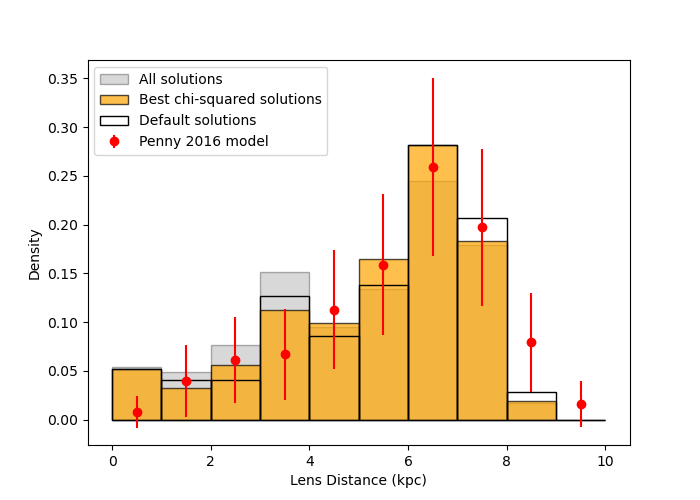

In [12]:
# Fetch data from the ML table in NASA Exoplanet Archive using astroquery
query = NasaExoplanetArchive.query_criteria(table="ML", select="pl_name,sy_dist,ml_modeldef,ml_modelchisq")
ML_df = query.to_pandas()

# Filter out rows with missing values and create a copy of the DataFrame
microlensing_df_clean = ML_df.dropna(subset=['sy_dist', 'ml_modelchisq']).copy()

# Convert distances from parsecs to kiloparsecs
microlensing_df_clean['sy_dist_kpc'] = microlensing_df_clean['sy_dist'] / 1000.0

# Identify the degenerate solutions with the lowest ml_modelchisq for each pl_name
microlensing_df_best_chisq = microlensing_df_clean.loc[microlensing_df_clean.groupby('pl_name')['ml_modelchisq'].idxmin()]

# Filter for entries with ml_modeldef = 1
microlensing_df_default = microlensing_df_clean[microlensing_df_clean['ml_modeldef'] == 1]

# Calculate histograms
bins = np.linspace(0, 10, 11)
all_hist, _ = np.histogram(microlensing_df_clean['sy_dist_kpc'], bins=bins, density=True)
best_chisq_hist, _ = np.histogram(microlensing_df_best_chisq['sy_dist_kpc'], bins=bins, density=True)
default_hist, _ = np.histogram(microlensing_df_default['sy_dist_kpc'], bins=bins, density=True)

# Plotting the histograms
plt.close(5)
plt.figure(num=5, figsize=(7, 5))
plt.hist(microlensing_df_clean['sy_dist_kpc'], bins=bins, color='grey', edgecolor='black', alpha=0.3, density=True, label='All solutions')
plt.hist(microlensing_df_best_chisq['sy_dist_kpc'], bins=bins, color='orange', edgecolor='black', alpha=0.7, density=True, label='Best chi-squared solutions')
plt.hist(microlensing_df_default['sy_dist_kpc'], bins=bins, facecolor='none', edgecolor='black', alpha=1.0, density=True, label='Default solutions')

# Adding Penny Errorbars
penny_model_df = pd.read_csv('Data/Penny2016F1-model.csv', header=0, skipinitialspace=True)
normalise = penny_model_df['f'].sum()
plt.errorbar(penny_model_df['D_L'], penny_model_df['f']/normalise, yerr=penny_model_df['f_err']/normalise, fmt='o', color='red', label='Penny 2016 model')

# Labels and title
plt.xlabel('Lens Distance (kpc)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

# Save plot
#plt.savefig('./Products/microlensing_lens_distance_histogram.png', dpi=300)

From this plot we can see that, more often than not, the default solution and lowest $\chi^2$ solution are a more distant degenerate solution. The oversized peak in the all-solutions lens-distance distribution at 4 kpc appears to be an artificat created by degenerate solutions to common ~6 kpc lenes. This artefact is mostly resolved when including only the lowest $\chi2$ solutions. 

But why are the distributions different?



The microlensing method has revealed a diverse array of exoplanets, from high-$q$ gas-giants to lonely Earth-sized worlds. This diversity of systems broadens our understanding of the many ways in which stars and planets interact within our galaxy, and even speaks to the plausibility of planetary formation theories.

A prime example of this diversity is given in microlensing event OGLE-2016-BLG-1928 [Mroz et al. (2020)](http://ui.adsabs.harvard.edu/abs/2020ApJ...903L..11M). This was a single-lens event with an extremely small timescale ($t_{\rm E} = 40\,{\rm min}$); the event had a decisively planetary-mass lens without an obvious host star. This type of exoplanet is known as a free-floating planet (FFP). Its mass was estimated at a likely $0.3 \,M_\oplus$, which would make it the smallest microlensing FFP, to date. OGLE-2016-BLG-1928 is thought to have formed around a host star, having later been ejected from its birth system after a dynamical squabble with a sibling planet; i.e., through planet-planet scattering. It must be noted that, for this and all other microlensing FFPs, the possibility of the lens actually being a wide-orbit, bound planet cannot be ruled out. Instead, the general practice is to consider just how wide the planet must be from any potential bound host, at a minimum, given that the host has not been detected. For example, [Mroz et al. (2020)](http://ui.adsabs.harvard.edu/abs/2020ApJ...903L..11M) gives a lower limit on the projected host separation, for OGLE-2016-BLG-1928, of $\sim8.0\,\rm{au}$.

> FFPs are often more colloquially know as "rouge planets" in scientific media.

Microlensing, unlike RV, transit, and direct imaging methods, is sensitive to low-mass and/or dim hosts due to the lens-system luminosity not influencing the source-star magnification of a microlensing event. [Paczynski (1986)](http://ui.adsabs.harvard.edu/abs/1986ApJ...301..503P) proposed that microlensing could prove uniquely sensitive to FFPs that are non-local and/or no longer in their youth. This has been proven with the observations of the eight FFPs listed in the table below. While the masses given for these planets are merely estimates based on assumptions about disk or bulge membership, their characterisation as *planets* (or rather, of planet-like mass), in the broad sense, is far more certain.

| Event ID | Mass (M<sub>J</sub>) | Reference |
| :-: | :-: | :-: |
| MOA-9y-770 | ${0.07\pm0.02}$ | [Koshimoto et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023AJ....166..107K) |
| MOA-9y-5919 | ${0.002^{+0.0004}_{-0.001}}$ | [Koshimoto et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023AJ....166..107K) |
| OGLE-2016-BLG-1540 | $1.5^{+45.5}_{-1.2}$ | [Mroz et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018AJ....155..121M), [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) | 
|  | $2.0^{+38.0}_{-1.6}$ | [Mroz et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018AJ....155..121M), [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) |
| OGLE-2012-BLG-1323 | $0.04^{+0.11}_{-0.02}$ | [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) | 
|  | $0.09^{+0.66}_{-0.07}$ | [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) |
| KMT-2022-BLG-2397 | $\sim8$ | [Gould et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023AJ....166..100G) |
| OGLE-2016-BLG-1928 | $\sim0.001$ | [Mroz et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..262M) |
| KMT-2019-BLG-2073 | $\sim0.2$ | [Kim et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....162...15K) |
| KMT-2017-BLG-2820 | | [Ryu et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....161..126R) |
| OGLE-2019-BLG-0551 | $~0.024$ | [Mroz et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..262M) |

There are numerous other mechanisms through which FFPs are thought to come about (see the review of [Mroz and Poleski (2024)](https://arxiv.org/abs/2310.07502) and references therein). These include: 
* forming like a star through gravitational collapse, 
* failed star embryos, and 
* ejection after normal planet formation. 

The leading theories for planetary formation mechanisms are core accretion ([Pollack et al.,1996](https://ui.adsabs.harvard.edu/abs/1996Icar..124...62P)) and disk instability ([Boss, 1998](https://ui.adsabs.harvard.edu/abs/1998ApJ...503..923B)). Possible ejection processes include:
* gravitational instability in the protoplanetary disk, 
* planet-planet scattering, 
* post-main-sequence evolution processes in the host, 
* dynamical interactions in binary or multiple-star host systems, 
* stellar fly-bys, 
* or dynamical interactions within a star cluster or star-forming region. 

It is possible for very young nearby FFPs, which are yet to cool after their formation, to be directly observed. This is shown through direct-imaging observations of large, gas FFPs found in Orion ([Lucas and Roche, 2000](https://arxiv.org/abs/astro-ph/0003061)). However, limitations in age and distance mean that population inferences from direct imaging samples are heavily biased. In contrast, [Gould et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022JKAS...55..173G) demonstrated that the distribution of angular Einstein radii ($\theta_{\rm E}$) of the events observed by KMTNet is consistent with a power-law distribution of masses of FFP candidates. Furthermore, [Mroz and Poleski (2024)](https://arxiv.org/abs/2310.07502) summarised that, according to microlensing population studies (e.g., [Mroz et al., 2017](https://ui.adsabs.harvard.edu/abs/2017Natur.548..183M); [Gould et al., 2022](https://ui.adsabs.harvard.edu/abs/2022JKAS...55..173G); [Sumi et al., 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....166..108S)), FFPs, if indeed unbound, may be more common than gravitationally-bound exoplanets. 

### 2.2 Brown dwarfs
A brown dwarf is a sort of hybrid object, which is usually distinguished as being more massive than a planet and less massive than a star. They are sometimes referred to as failed stars, although this implies knowledge of their formation method that is possibly unfounded. The distinguishing feature of a brown dwarf is that, unlike gas giant planets, they can fuse deuterium in their cores. The lower mass limit for a brown dwarf is frequently quoted in the literature as $13\,M_{\rm J}$ (see [Data/filename.csv]() and references therein); the approximate mass at which deuterium fusion is typically possible. The upper mass limit is also vague. Brown dwarfs are distinguished from stars by their lack of *sustained* hydrogen fusion in the core. This distinction does not require a lack of hydrogen fusion, but a lack of hydrogen fusion after the additional heat created during formation has worn off. The mass at which this occurs varies widely depending on metalicity. $75\,M_{\rm J}$ is a boundary regularly used in the microlensing literature (see [Data/filename.csv]() and references therein), although this boundary is potentially anywhere from $70-95\,M_{\rm J}$, depending on metallicity ([Dieterich et al., 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...865...28D); [Chabrier & Baraffe, 1997](https://ui.adsabs.harvard.edu/abs/1997A&A...327.1039C); [Forbes & Loeb, 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..227F)). 

> [This talk, by Jackie Faherty](https://www.youtube.com/watch?v=Qqd_VTGZNb8), provides a fantastic discussion on the importance of brown dwarfs and the complicated overlap between brown dwarfs and exoplanets, if you have a spare hour and a quarter.

#### 2.2.1 Brown dwarf observations and microlensing discoveries
Microlensing has been used to discover a number of brown dwarfs in the form of singles lens events, as companions to stellar-type hosts, in brown-dwarf binaries, and as hosts to planetary companions[. The microlensing brown-dwarf discoveries are collated in [Data/filename.csv](). This table enforces broader mass limits on brown dwarfs than that used in [Chung et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C), which noted 34 microlensing brown-dwarf discoveries, at the time of publication. The first of these was the single-lens brown-dwarf event OGLE-2007-BLG-224 ([Gould et al., 2009](https://ui.adsabs.harvard.edu/abs/2009ApJ...698L.147G)), which was verified, through non-detection, with high-resolution, adaptive-optics (AO) follow up in [Shan et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...908..240).

> AO is a technique used in ground-based astronomy where the mirror is adaptively deformed to counter atmospheric distortion.  

The full empirical sample of microlensing events appears to have a low-probability region in $\theta_{\rm E}$ (the angular size of the Einstein ring, or angular scale of the lens), dubbed the Einstein desert: $9\,\rm{\mu as}<\theta_{\rm E}<25\,\rm{\mu as}$ (first observed in [Mroz et al., 2017](https://ui.adsabs.harvard.edu/abs/2017Natur.548..183M); coined in [Kim at al., 2021](https://ui.adsabs.harvard.edu/abs/2021AJ....162...15K)). 

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 6</h2>
    <p>What are the masses implied by this angular lens scale, given a D<sub>S</sub>=8 kpc source (i.e., a bulge source at approximately the Galactic centre).</p>
    <br>
    <p>Note that equal areas under this graph do not have equal detection probability.</p>
    <br>
</div>

<>:3: SyntaxWarning: invalid escape sequence '\k'
<>:3: SyntaxWarning: invalid escape sequence '\k'
/var/folders/yk/2lp5vmnd6s778_4bh__0mvyc0000gp/T/ipykernel_7786/2860350769.py:3: SyntaxWarning: invalid escape sequence '\k'
  """


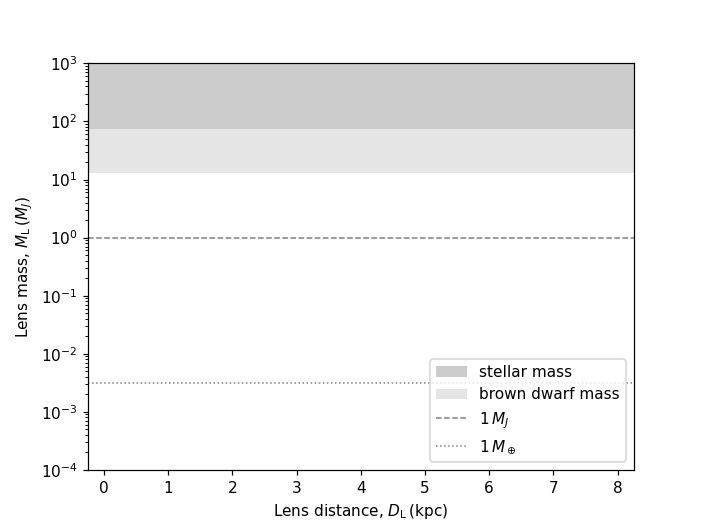

In [13]:
def MfromthetaE(theta_E: Union[np.ndarray, float], DL: Union[np.ndarray, float], 
                DS: Union[np.ndarray, float] = 8.0) -> Union[np.ndarray, float]:
    """
    Calculate the lens mass, M.
    
    Parameters
    ----------
    theta_E : np.ndarray or float
        Micro arc seconds.
    DL : np.ndarray or float
        Distance to the lens in kpc.
    DS : np.ndarray or float, optional
        Distance to the source in kpc (default is 8.0, the distance to the Galactic center).
    
    Returns
    -------
    M : np.ndarray or float
        Lens mass in Jupiter masses, same shape as theta_E.
    
    Notes
    -----
    The lens mass is calculated using the formula:
    
    .. math::
        M = \frac{\theta_E^2}{\kappa \pi_{rel}}
    
    where
    
    .. math::
        \kappa = 8.144 \, \text{mas}/M_\odot
    
    and
    
    .. math::
        \pi_{rel} = \text{au} \left( \frac{1}{D_L} - \frac{1}{D_S} \right)
    
    Here, au indicates that we are working in parsec distances and angles, because by definition, 
    1 parsec is the distance to an object with a parallax angle of 1 arc second.
    
    .. math::
        d = \frac{1}{p}
    
    where d is the distance to the star in parsecs (1 pc = 3.26 light-years) and p is the parallax angle in arc seconds.
    
    Note: $M_\odot = 1047.57 M_J$ according to Google.
    """

    # Constants
    KAPPA = 8.144  # mas/MS
    MS_MJ = 1047.57 # mass of the sun in jupiter masses (MJ)
    KAPPA_MUMJ = KAPPA*1000/MS_MJ  # muas/MJ
    #au = 0.000484814  #kpc
    #rad_deg = 1.0*180.0/np.pi  # 1 radian in degrees
    #deg_as = 1.0*60.0*60.0  # 1 deg in mas
    AS_MUAS = 1.0*1000000.0  # 1 as in muas
    #rad_muas = rad_deg*deg_as*as_muas  # 1 rad in muas

    #pirel_rad = au*(1.0/DL-1.0/DS)  # DL, DS and au are all in kpc. pi is in rad (small angle appeoximation)
    #pirel_muas = pirel_rad*rad_muas  # converting units to muas
    pirel_as = (1./(DL*1000)-1.0/(DS*1000))
    pirel_muas = pirel_as*AS_MUAS
    M = theta_E**2/(KAPPA_MUMJ*pirel_muas)  # M in Jupiter masses

    return M


# x values
D_L = np.linspace(0.01,7.99,799)

# plot stuff
plt.close(6)
plt.figure(num=6, dpi=110)
xmin, xmax = -0.25, 8.25

# Annotation arrays
plot_x = np.linspace(xmin,xmax,150)
plot_y_J = np.ones_like(plot_x)
plot_y_BD = plot_y_J*13.0
plot_y_DF = plot_y_J*75.0
plot_y_E = plot_y_J*0.00314558

######################

######################

# Background fill
plt.fill_between(plot_x, plot_y_DF, 10**3, 
                 color='k', alpha=0.2, ec=None, 
                 label='stellar mass')
plt.fill_between(plot_x, plot_y_BD, plot_y_DF, 
                 color='grey', alpha=0.2, ec=None, 
                 label='brown dwarf mass') #, hatch='*'

# Reference mass lines
plt.axhline(1, 
            color='grey', 
            linestyle='dashed', 
            linewidth=1, 
            label=r'$1\,M_J$')
plt.axhline(0.00314558, 
            color='grey', 
            linestyle='dotted', 
            linewidth=1, 
            label=r'$1\,M_\oplus$')

# plot stuff
plt.xlabel(r'Lens distance, $D_{\rm L}\, ({\rm kpc})$')
plt.ylabel(r'Lens mass, $M_{\rm L}\, (M_J$)')
plt.yscale('log')
plt.xlim((xmin, xmax))
plt.ylim((10**-4, 10**3))
plt.legend(loc='lower right')
plt.show()

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 7</h2>
    <p>Assuming all events have source distances of 8 kpc, make a histogram of the distribution of lens distances for all microlensing events containing brown dwarfs.</p>
    <br>
</div>

<>:5: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\k'
/var/folders/yk/2lp5vmnd6s778_4bh__0mvyc0000gp/T/ipykernel_7786/612734209.py:5: SyntaxWarning: invalid escape sequence '\k'
  """


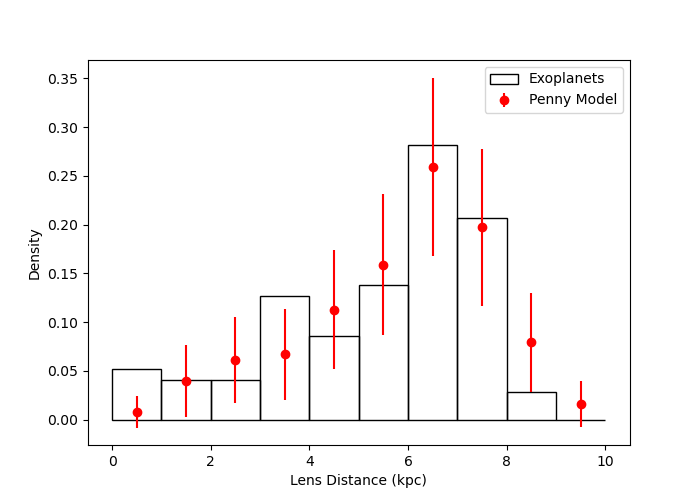

In [14]:
# I still need to write the sample code for this exercise

def calc_DL(M: Union[np.ndarray, float], theta_E: Union[np.ndarray, float], 
            DS: Union[np.ndarray, float] = 8.0) -> Union[np.ndarray, float]:
    """
    Calculate the lens distance, DL in kpc.

    Parameters
    ----------
    M : np.ndarray or float
        Solar masses.
    theta_E : np.ndarray or float
        Micro arc seconds.
    DS : np.ndarray or float, optional
        Distance to the source in kpc (default is 8.0, the approximate distance to the Galactic center).
    
    Returns
    -------
    DL : np.ndarray or float
        Lens distance in kpc, same shape as theta_E.
    
    Notes
    -----
    The lens distance is calculated using the formula:
    
    .. math::
        D_L = \frac{1}{\frac{1}{D_S} - \frac{\theta_E}{\kappa M}}
    
    where
    
    .. math::
        \kappa = 8.144 \, \text{mas}/M_\odot
    """

    # Constants
    kappa = 8.144  # mas/MS
    DL = 1.0/(1.0/DS - theta_E/(kappa*M))  # DL in kpc
    return DL

# Plot stuff
plt.close(7)
plt.figure(num=7, figsize=(7, 5))

# Histogram stuff
bins = np.linspace(0, 10, 11)

# BD data
'''
BD_SL_df = pd.read_csv('Data/filename.csv', header=0, skipinitialspace=True)
BD_BL_df = pd.read_csv('Data/filename.csv', header=0, skipinitialspace=True)
BD_df = pd.concat([BD_SL_df, BD_BL_df], ignore_index=True)
M = BD_df['M'] # Jupiter masses
M_solar = M * 317.8  # Solar masses
theta_E = BD_df['theta_E']  # muas
DL = calc_DL(M_solar,theta_E)  # kpc
weights = BD_df['P'] # crude solution probabilities #'''

######################
# BD histogram
'''
plt.hist(DL, 
         bins=bins, 
         color='grey', 
         edgecolor='black', 
         alpha=0.3, 
         density=True, 
         label='BD Solutions', 
         weights=weights) #'''
######################

# exoplanet histogram using data frames from exercise 4
default_hist, _ = np.histogram(microlensing_df_default['sy_dist_kpc'], 
                               bins=bins, 
                               density=True)
plt.hist(microlensing_df_default['sy_dist_kpc'], 
         bins=bins, 
         facecolor='none', 
         edgecolor='black', 
         alpha=1.0, 
         density=True, 
         label='Exoplanets')

# Adding Penny errorbars
penny_model_df = pd.read_csv('Data/Penny2016F1-model.csv', header=0, skipinitialspace=True)
normalise = penny_model_df['f'].sum()
plt.errorbar(penny_model_df['D_L'], 
             penny_model_df['f']/normalise, 
             yerr=penny_model_df['f_err']/normalise, 
             fmt='o', color='red', 
             label='Penny Model')

# Labels and title
plt.xlabel('Lens Distance (kpc)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

The microlensing brown-dwarf events, for which the full physical solution is known, show an unexpectedly high proportion with strange kinematics (e.g., [Chung et al., 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C), [Shvartzvald et al., 2017](https://ui.adsabs.harvard.edu/abs/2017ApJ...840L...3S), [Shvartzvald et al., 2019](https://ui.adsabs.harvard.edu/abs/2019AJ....157..106S), and [Malpas et al., 2022](https://ui.adsabs.harvard.edu/abs/2022AJ....164..102M)) and unexpectedly low-mass binaries (e.g., [Albrow et al., 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...858..107A), [Choi et al., 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...768..129C) and [Han et al., 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...778...38H)). This is discussed further in [Section 2.2.3](#223-counter-rotators-and-their-implications-for-the-mass-function). 

#### 2.2.2 Two different formation groups?
The mass overlap between obvious planets and seemingly stellar binaries raises the question as to whether there are two formation methods in play in the low-mass brown-dwarf or high-mass planetary regimes. Exactly how low does the stellar mass function go, and how high does the planetary mass function go? If there are two formation methods, how might we tell these individual objects apart; is there a microlensing proxy for formation method? 
            
A distinguishing microlensing event parameter used to identify likely planetary BL events is the mass ratio, $q$.  Ignoring brown-dwarf hosts and using the traditional planetary distinction ($M_{planet}<13\,M_{\rm J}$), one can define an upper limit in $q$ for planetary events of 
    $$q_{max}=\frac{M_{\rm dueterium\, fusion}}{M_{\rm hydrogen\, fusion}}=\frac{13\, M_{\rm J}}{95\,M_{\rm J}}=0.137.$$
Therefore, we can concentrate our investigations on $q\lesssim0.14$ events when specifically searching for clear exoplanet events. There is no tidy distinction, when we also consider possible brown-dwarf hosts.  The [IAU working definition of an exoplanet](https://ui.adsabs.harvard.edu/abs/2022NewAR..9401641L) has recently been expanded to include a soft upper limit in mass ratio of $q\simeq0.04$ for companions around brown-dwarf, stellar, and remnant hosts, but still requiring a mass below $13\,M_{\rm J}$.

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 8</h2>
    <p>What does the mass ratio distribution of microlensing brown dwarfs look like?</p>
    <br>
</div>


In [15]:
#q = BD_DF['q']  # mass ratio

######################

######################


As a thought experiment, we could propose a mass ratio distinction of $q_{thresh}=0.022$, matching the observed dip in $q$ from Exercise 8, and consider the implications for our current portfolios of brown-dwarf- and exoplanet- inclusive events. For this example, we assume lenses with $q>q_{thresh}$ belong wholly to the stellar population, while lenses with $q<q_{thresh}$ include one stellar member and one planetary member. Though this is merely a thought experiment, it is not inconsistent with the findings of [Suzuki et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...833..145S) for planetary lenses (see their Figure 13), nor with the observed mass ratio function for binary stars (e.g., [Sapozhnikov et al., 2020](https://ui.adsabs.harvard.edu/abs/2020ARep...64..756S), Figure 7). A universal $q=0.022$ cut-off would group all but one of the microlensing binaries, containing a stellar host and brown-dwarf companion, as stellar-stellar lenses. The last event left standing is OGLE-2015-BLG-0693 with a mass ratio of $q=0.019\pm0.015$, well within $1\sigma$ of our hypothetical cut-off. In which case, the implication would be that we are yet to conclusively find a brown-dwarf-mass object as a "planetary" companion, as expected from the mass cutoff. This same cut off, applied to brown-dwarf host events, is less consistent with the mass cutoff. There are nine events for which $q>q_{thresh}$, but which also have a mass lower than the deuterium fusion limit ($m_2<13M_{\rm J}$); the mass of these companions would conflict with a $q$-based distinction of "planet." 
                
Meanwhile, applying the same cut-off to the solutions presented in the NASA Exoplanet Archive, decisively yields stellar-planetary characterisations for a large proportion of the presented solutions (see Figure 9). This is somewhat by design, as contributors often search specifically for low-$q$ events when looking for exoplanets.

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 0 10px 20px;  /* top, right, bottom, left */
    margin: 20px 5px;  
    box-sizing: border-box;  
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 9</h2>
    <p>A comparison of exoplanet and brown-dwarf event component masses and reference mass thresholds is shown in the Figure below (Figure 9). Annotate some theoretical mass-ratio thresholds onto the figure; q<sub>thresh</sub>=(0.14, 0.04, 0.02).</p>
    <br>
    <p>Brown-dwarf companion solutions are shown in blue and brown-dwarf host solutions in purple and the Nasa Exoplanet Archive events are black crosses. The opacity of the samples is meant to represent relative probability of degenerate solutions where less probable solution are more opaque. q>1 means the primary and secondary have been defined in reverse. q above 0.14 this resolutely stellar, by the classical definition</p>
    <br>
</div>



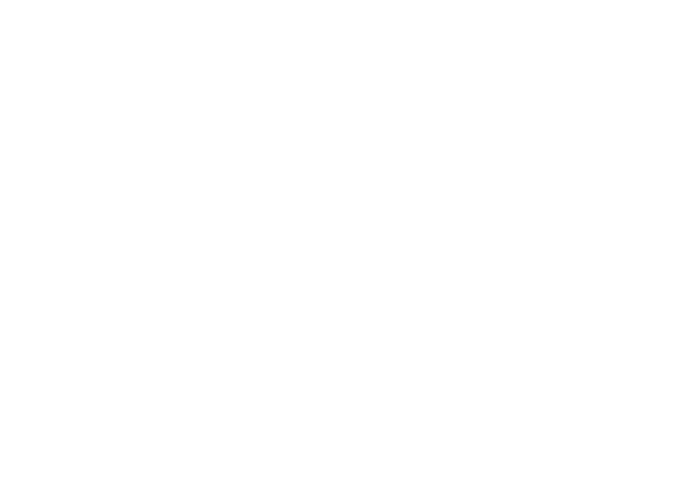

In [16]:
plt.close(9)
plt.figure(num=9, figsize=(7, 5))

######################
# Your code goes here
######################

plt.show()

While a mass-ratio threshold appears more convincing than the mass threshold, the "best" value for this threshold is arguable, and grounds for differentiating the populations this way are not obvious, visually.

We could also take the radical approach of considering that there is no firm distinction between stars and planets and that we are arguing for a binary mindset in a single population whose differences are on a continuum; maybe this whole exercise is one of taxonomy for the sake of taxonomy.

It is worth noting that the characterisations of these events, which we are using to interpret the limitations of our Galactic model, are quite often inferred by employing the very same models. This is somewhat circular logic, and though this exercise may prove enlightening, it is by no means conclusive. Besides which, regularly inferring from a model in this way will have the effect of buffing away the edge cases, by avoiding truths that correspond to perfectly plausible physical solutions that are not the most probable ones. 

The existence of brown dwarfs in binaries with members below the $13\, M_{\rm J}$ limit and $q$ above the classical, planetary, upper-$q$ cut-off (OGLE-2011-BLG-0420 and OGLE-2009-BLG-151, [Choi et al., 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...768..129C); MOA-2016-BLG-231, [Chung et al., 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C); OGLE-2016-BLG-1266, [Albrow et al., 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...858..107A)) seems to imply that these objects can form like stars at masses below $13\, M_{\rm J}$. Potentially, that is the case with free-floating, Jupiter-mass planets (e.g., OGLE-2016-BLG-1540, [Mroz et al., 2018](https://ui.adsabs.harvard.edu/abs/2018AJ....155..121M)). This is supported by simulations that predict that it is low-mass (i.e., terrestrial) planets that are most likely to be dynamically ejected (e.g. [Ma et al., 2016](https://ui.adsabs.harvard.edu/abs/2016MNRAS.461L.107M)), and that stellar formation processes may be valid down to $1-4\, M_{\rm J}$ ([Boyd & Whitworth, 2005](https://ui.adsabs.harvard.edu/abs/2005A&A...430.1059B); [Whitworth & Stamatellos](https://ui.adsabs.harvard.edu/abs/2006A&A...458..817W)).

It is also worth noting that the mass estimates of FFPs all make sweeping generalisations to infer mass. While they are very likely of classical planetary mass, it is often less clear if they belong to a population of disk FFPs in the $M_\oplus$ regime or bulge FFPs in the $M_{\rm J}$ regime. Some FFP events have kinematics that allow for an argument of one over the other (i.e., a bulge lens over a disk lens or vice versa). Even then, the masses for this population are generally given with a condition on the use of an estimated relative parallax of the lens and source ($\pi_{\rm rel}$).

#### 2.2.3 Counter-rotators and their implications for the mass function
The brown-dwarf population also plays host to a group of kinematic oddities; [Chung et al., (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C), [Shvartzvald et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019AJ....157..106S), [Shvartzvald et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017ApJ...840L...3S). These strange objects are important for a number of reasons. Firstly, they may point to a systemic misdiagnosis of the physical properties of the lens. These events are all reliant on parallax measurements made using the *Spitzer* space telescope to break the mass-distance degeneracy, so one obvious explanation for their obscurity is that the measurements themselves are faulty, as proposed in [Koshimoto & Bennett (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....160..177K). This proposal could, in theory, be supported by AO follow-up in disagreement with a questionable-*Spitzer*-measurement lens interpretation. To date, there have been no such follow-up interpretations *conclusively* in opposition to *Spitzer*-based interpretations.
 
Further evidence to support these unexpected kinematic results would allow us to explore more creative and interesting explanations for their existence. Given how difficult brown dwarfs are to observe, our expectations for this population are often extrapolations of the observed characteristic of more luminous stellar populations. The implications from the perspective of a Galactic model could come in many forms. For example: there is a missing mass dependence in the density profile or velocity dispersion, or the very-low-mass, non-luminous end of the mass function has been dramatically underestimated and, as a result, we may also be underestimating our luminosity-to-mass inferences on a cosmological scale.
        
FFPs and single-lens brown dwarfs occupy the short-event end (low-$t_{\rm E}$, or low-$\theta_{\rm E}$) of microlensing sensitivity. This sensitivity is challenged again at the long-event end (high-$t_{\rm E}$, or high-$\theta_{\rm E}$) by another dim lens in the form of black holes. 

### 2.3 Black holes and other remnants


### 2.4 Dark matter
The other non-luminous elephant in the room is dark matter. Gravitational lensing has already proven its usefulness at "observing" diffuse collections of dark matter, as in the case of the [Bullet Cluster](https://en.wikipedia.org/wiki/Bullet_Cluster) (below), but detecting it using microlensing is more of a challenge. 

| The Bullet Cluster |
| :-: |
| <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/1e0657_scale.jpg/600px-1e0657_scale.jpg" alt="The Bullet Cluster" width="560"/> |
| Composite image showing the galaxy cluster [1E 0657-56](https://chandra.harvard.edu/photo/2006/1e0657/more.html), better known as Bullet Cluster. The image in background showing the visible spectrum of light stems from Magellan and Hubble Space Telescope images. The pink overlay shows the x-ray emission (recorded by Chandra Telescope) of the colliding clusters, the blue one represents the mass distribution of the clusters calculated from gravitational lens effects. Scale: Full image is 7.5 arcmin wide, 5.4 arcmin high. **Credit:** [NASA](http://www.nasa.gov/)/[CXC](https://cxc.harvard.edu/)/[Chandra X-Ray Observatory](https://chandra.harvard.edu/) **Acknowledgment:** M. Weiss |
        
Microlensing is a fine-grain tool compared to large-scale lensing, and finding specific kinds of events takes a concerted effort, with tailored observing and data processing strategies. Microlensing surveys are oriented toward the bulge because it provides densely populated images, increasing the chance of transient alignment events, and the distance scales are compatible with the detection of lenses with masses ranging from planetary to stellar. For example, if we wanted to search for black holes on a much shorter time frame, with event timescales on the order of days to months, we would want to look for these objects at lens and source distance more like $1000\,\rm{kpc}$, which is to say in other galaxies in the local group, introducing a plethora of new observing challenges. Therefore, observing dark matter with microlensing requires some knowledge or theories about what it is.

Dark matter is thought to interact with ordinary matter (matter composed of protons, neutrons, and electrons) through gravitational force, but not emit light or interact electromagnetically. 

#### 2.4.1 Why do we need it?
Dark matter is necessary to explain the collapse of the fairly homogeneous gas of the early universe, to progressively bigger clumps. This homogeneity is demonstrated by the Cosmic Microwave Background (CMB), which has density variations on the order of $10^{-5}$ [(Plank Collaboration, 2016)](https://ui.adsabs.harvard.edu/abs/2016A&A...594A...1P). For the majority of its first $\sim300\,000$ years, the universe was a big photon-baryon soup. In the very early universe, quantum fluctuations created potential hills and wells, which were stretched onto cosmic scales during the rapid expansion period. These potential wells drew in material, but photon pressure in the baryon-photon fluid resisted this compression, resulting in oscillations. These oscillating pressure waves are known as baryonic acoustic oscillations and are responsible for the density landscape of the current universe; when the universe had cooled enough for atoms to form ([recombination](https://en.wikipedia.org/wiki/Recombination_(cosmology))), the baryon-photon fluid released photons (first light, now observed as the CMB) and the pressure waves froze as they were. Dark matter acted to deepen the potential wells (gravitationally attracting material, but without the photon pressure forcing it to oscillate), which affected the acoustic oscillations. The specific manner in which the oscillations are predicted to be affected is supported by observed temperature variations in the CMB [Hu, 2000](https://ui.adsabs.harvard.edu/abs/2000Natur.404..939H).

> These effects and processes are well explained in [Wayne Hu's Intermediate Guide to the Acoustic Peaks and Polarization](http://background.uchicago.edu/~whu/intermediate/intermediate.html). 
     
<h5> <i>"Diffusion damping during recombination is expected to wipe out all small-scale structure in baryons, preventing the formation of galaxies at late times. Dark matter, however, can sustain structure during the damping regime, and will seed the formation of galaxies" </i> <a href="https://ui.adsabs.harvard.edu/abs/2012PhR...513....1C"> - Clifton et al. (2020)</a> </h5>

Dark matter is also used to explain the rotation curves we see in galaxies ([Linbald, 1927](https://ui.adsabs.harvard.edu/abs/1927MNRAS..87..553L); [Babcock, 1939](https://ui.adsabs.harvard.edu/abs/1939LicOB..19...41B); and [Oort, 1940](https://ui.adsabs.harvard.edu/abs/1940ApJ....91..273O)). The expectation, from the density of luminous matter in galaxies, is for decreasing rotational velocity with radius (beyond the solid body rotation at the centre). However, observations of galaxies and clusters have consistently flat rotation curves ([Rubin & Ford, 1970](https://ui.adsabs.harvard.edu/abs/1970ApJ...159..379R)). Our current understanding of dark matter's role in Galactic structure is that it exists in a roughly spherical "halo" ([Navarro, Frenk, & White, 1996](https://ui.adsabs.harvard.edu/abs/1996ApJ...462..563N); see also, [**NFW Profile**](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile)), while the normal, radiative, star-forming gas collapses into a disk. This explains the flat rotation curves that we observe in galaxies because the mass is not concentrated in the Galactic centre. 

Dark matter is also necessary to explain the velocity dispersions we see in galaxy clusters ([Zwicky, 1933](https://ui.adsabs.harvard.edu/abs/2009GReGr..41..207Z)).

Dark matter is not a necessary part of the standard model of particle physics and cannot be described without extension to the standard model. Dark matter is entirely superfluous given our current understanding of particle physics. The existence of dark matter is entirely supported by astrophysical observations that do not match our models.

#### 2.4.2 What is it?
There have been many proposed particle-physics solutions put forward to solve this astrophysical problem. Dark matter has been proposed in the form of exotic particles, such as [WIMPs (Weakly interacting massive particles)](https://en.wikipedia.org/wiki/Weakly_interacting_massive_particle), [axions](https://en.wikipedia.org/wiki/Axion), and [sterile neutrinos](https://en.wikipedia.org/wiki/Sterile_neutrino). However, searches for these exotic particles have been largely fruitless (see, for example, the following review articles: [Peter, 2012](https://ui.adsabs.harvard.edu/abs/2012arXiv1201.3942P); [Profumo, Giani, & Piattella, 2019](https://ui.adsabs.harvard.edu/abs/2019Univ....5..213P)).

Another proposed solution to the dark matter problems is modified Newtonian dynamics ([MOND](https://en.wikipedia.org/wiki/Modified_Newtonian_dynamics); [Milgrom, 1983](https://ui.adsabs.harvard.edu/abs/1983ApJ...270..365M)), which postulates that this issue with rotation curves is not with our understanding of the composition of galaxies, but instead with our understanding of gravity at large distances. MOND described the gravitational force, beyond some acceleration limit, $a_0$, to be decreasing proportional to inverse radius as opposed to the inverse square radius of Newtonian dynamics. The theories developed to marry MOND with general relativity are collectively termed modified gravity (summarised in [Clifton et al., 2012](https://ui.adsabs.harvard.edu/abs/2012PhR...513....1C)). Arguments against modified gravity basically reduce to their mathematical formulations being phenomenological. Conversely, an oversimplification of arguments against general relativity being complete, and particle dark matter necessary, are the density model inconsistencies from cosmological to galactic scales (i.e., the cusp/core problem; [Del Popolo & Le Delliou, 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220914151D)).

This [video](https://www.youtube.com/watch?v=HJ8F0pfNTgM) explains how recent observations from [JWST](https://en.wikipedia.org/wiki/James_Webb_Space_Telescope) have created a resurgence in MONDs popularity.

<img align=left src="./Assets/MOND_GoogleTrends.png" alt="GoggleTrend results for MOND" width="450"/>
<p align=right>
<iframe width="560" height="315" src="https://www.youtube.com/embed/HJ8F0pfNTgM" title="Has JWST shown that dark matter doesn’t exist?" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p> 


Astrophysical suggestions for dark matter include primordial black holess and Massive Astrophysical Compact Halo Objects ([MACHOs](https://en.wikipedia.org/wiki/Massive_compact_halo_object)). MACHOs are meant to include all dim astrophysical bodies, which may or may not be composed of baryonic matter: primordial black holes, FFPs, brown dwarfs, neutron stars, white dwarfs, and black holes. Determining the prominence of these objects in the Galactic Halo was the primary science goal of the MACHO Collaboration ([Alcock et al., 1993](https://ui.adsabs.harvard.edu/abs/1993Natur.365..621A)). 

> Primordial black holes are a theorised (in [Zel'dovich & Novikov, 1966](https://ui.adsabs.harvard.edu/abs/1966AZh....43..758Z)) type of black hole that are meant to have formed in the first moments of the universe, when it was between $10^{-36}\,\rm{s}$ and $10^{-32}\,\rm{s}$ old. Those with masses of $10^{12}\,\rm{kg}$ to thousands of solar masses would have survived (and not evaporated via Hawking radiation) to the current age of the universe ([Carr et al., 2010](https://ui.adsabs.harvard.edu/abs/2010PhRvD..81j4019C) and [Wang et al., 2021](https://ui.adsabs.harvard.edu/abs/2021PhRvD.103d3010W)).
        
The underlying assertion behind astrophysical explanations for dark matter is that the problem is with our population models, not with our understanding of matter. The bonus to this interpretation is that one does not have to solve all of the problems that indicate the existence of dark matter at once because they are born of different models.  For example, MACHOs could explain the problem with the rotation curves of galaxies, but have no bearing on baryonic acoustic oscillations in the early universe.

#### 2.4.3 The MACHO project
If MACHOs are responsible for the rotation curve of our galaxy, then source stars in the [Magellanic clouds](https://en.wikipedia.org/wiki/Magellanic_Clouds) (the small Magellanic cloud (SMC) and large Magellanic cloud (LMC) dwarf galaxies orbiting the [Milky Way](https://en.wikipedia.org/wiki/Milky_Way)). They have apparent sizes (in V band) of $11\times9\,{\rm deg}$ and $5\times3\,{\rm deg}$, and are located at $({\rm RA},{\rm Dec})=(05^{\rm h}\, 23^{\rm m}\,34^{\rm s}, -69^o \, 45.4')$ and $({\rm RA},{\rm Dec})=00^{\rm h}\, 53^{\rm m}\,44.8^{\rm s},-72^o \, 49'\,43'')$, respectively.} have an approximately $10^{-6}$ probability of undergoing strong lensing on a microlensing scale ([Paczynski, 1986](https://ui.adsabs.harvard.edu/abs/1986ApJ...304....1P)). The early microlensing surveys concentrated on SMC and LMC pointings because the number of stars in the SMC and LMC brought the probability of lensing events occurring up to reasonable levels, the line of sight is dominated by ``halo'' space, and the range of possible lens and source distances allowed for a large range of mass sensitivities ($10^{-7}\,M_\odot$ to $100\,M_\odot$; [Griest, 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...366..412G)). They also recognised early on the benefits of bulge-directed observations, for their higher predicted event rate, for finding disk dark matter and probing the low-mass end of the stellar mass function ([Paczynski, 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...371L..63P), [Griest et al., 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...372L..79G)). 

The microlensing contribution to this dark-matter story are well summarised in [*"Three decades of the OGLE survey"*](https://www.astro.sk/caosp/Eedition/FullTexts/vol54no2/pp234-248.pdf) ([Soszynski, 2024](https://ui.adsabs.harvard.edu/abs/2024CoSka..54b.234S)). But, suffice it to say that the number of halo lensing events did not meet the expectations set by a MACHO-dark-mater model. This is summarised in the findings of [Mroz et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024arXiv240302398M);  in 20 years, there have been 13 event detections facing the LMC, all of which could plausibly be explained by disk or LMC lens stars. They conclude that MACHOs in the mass range of $1.3\times10^{-5}\,M_\odot\lesssim M\lesssim860\,M_\odot$, could, at most, explain 10% of the dark-matter budget.

The community fairly quickly pivoted their attention to leveraging microlensing for exoplanet studies ([Sackett, 1997](https://ui.adsabs.harvard.edu/abs/1997astro.ph..9269S)). While the first LMC directed lensing event was detected in 1993 ([Alcock et al., 1993](https://ui.adsabs.harvard.edu/abs/1993Natur.365..621A)), the first conclusive planetary-companion binary lens was OGLE 2003-BLG-235/MOA 2003-BLG-53 ([Bond et al., 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...606L.155B)).

The unexpected large number of microlensing FFPs resulted in a brief resurgence in the idea of MACHO dark matter (specifically the idea that the FFPs may be msidiagosed, Earth-mass, promordial black holes; [Niikura, 2019](https://arxiv.org/abs/1901.07120)) that was ultimately quelled by dedicated, higher-cadence survey observations of the Magellanic clouds by the OGLE team ([Mroz et al., 2024](https://ui.adsabs.harvard.edu/abs/2024ApJ...976L..19M))

Although initially proposed as a method for detecting astrophysical objects in the halo to explain dark matter, microlensing praxis (its observational tactics, analysis techniques, and science goals) has dramatically evolved over the lifetime of the field. The research priorities and practices of current microlensing teams are heavily influenced by past and future incarnations of this field. Currently, microlensing is a tool used first and foremost for finding and classifying exoplanets, with brown dwarf observations being more incidental than directed, and black-hole detections a convenient expansion of goals based on existing data. Like a Pokemon, micolensing can be thought of as having three evolutionary states. We are currently all excitedly waiting for its next evoloution, with the scheduled launch of the [Nancy Grace Roman Space Telescope](NGRST.ipynb), in 2027. If you are interested in learning more about the evolutions of microlensing, they are the topic of the [Microlensing Eras](Eras.ipynb) notebook.

## Next steps

Oh hey, you're finished! Well done. That was huge.

The next notebook I recommend you try is:

- [Microlensing Eras](Eras.ipynb)

But these would also be good choices:
- [Single Lenses](SingleLens.ipynb)
- Photometry (in development) 
- [Modelling](Modelling.ipynb)
- The Galactic Model (in development) 
- NGRST (in development) 

If none of those tickle you fancy, try picking any one of the other notebooks within the `Notebooks` directory. The top of each notebook will tell you if there are any other notebooks that are recommended to be completed before starting, but this is your journey; you do you.